
## 1. Configuração

Importamos as bibliotecas permitidas pelo regulamento: NumPy, Pandas, Scikit-Learn e bibliotecas de visualização Matplotlib/Seaborn.



## 2. Carregamento dos Dados

Lemos os arquivos `train.csv` e `test.csv`, verificando dimensões e estrutura básica.


In [15]:

train.describe().T


,count,mean,std,min,25%,50%,75%,max
id,646.0,4.615774e+02,2.648595e+02,1.0,233.250,4.595000e+02,6.925000e+02,9.230000e+02
age_first_funding_year,611.0,2.341718e+00,2.468275e+00,0.0,0.680,1.650000e+00,3.600000e+00,2.190000e+01
age_last_funding_year,637.0,4.037724e+00,2.950923e+00,0.0,1.870,3.610000e+00,5.590000e+00,2.190000e+01
age_first_milestone_year,508.0,3.352657e+00,2.866952e+00,0.0,1.185,2.785000e+00,4.935000e+00,2.468000e+01
age_last_milestone_year,535.0,4.944729e+00,3.213319e+00,0.0,2.540,4.620000e+00,6.880000e+00,2.468000e+01
relationships,646.0,7.948916e+00,7.397602e+00,0.0,3.000,6.000000e+00,1.000000e+01,6.300000e+01
funding_rounds,646.0,2.351393e+00,1.357856e+00,1.0,1.000,2.000000e+00,3.000000e+00,8.000000e+00
funding_total_usd,646.0,2.949633e+07,2.261999e+08,11000.0,3000000.000,1.020000e+07,2.587500e+07,5.700000e+09
milestones,646.0,1.913313e+00,1.337095e+00,0.0,1.000,2.000000e+00,3.000000e+00,6.000000e+00
is_CA,646.0,5.464396e-01,4.982245e-01,0.0,0.000,1.000000e+00,1.000000e+00,1.000000e+00



## 3. Exploração e Visualização

Avaliamos a distribuição da variável alvo e investigamos relações entre variáveis contínuas e o sucesso das startups.


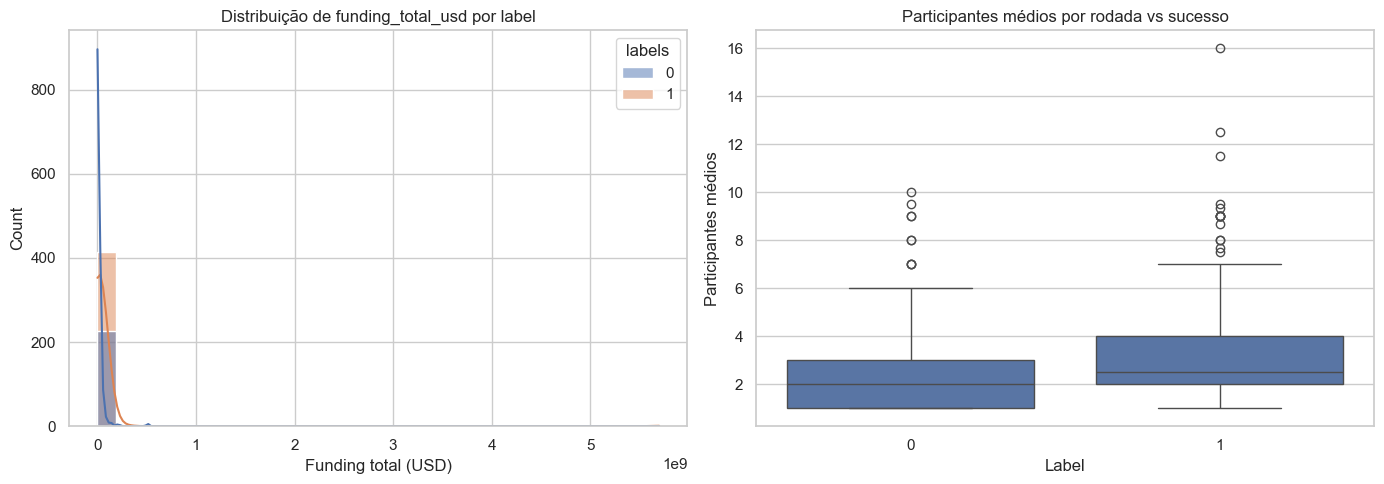

In [16]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=train, x='funding_total_usd', hue='labels', kde=True, ax=axes[0], bins=30)
axes[0].set_title('Distribuição de funding_total_usd por label')
axes[0].set_xlabel('Funding total (USD)')

sns.boxplot(data=train, x='labels', y='avg_participants', ax=axes[1])
axes[1].set_title('Participantes médios por rodada vs sucesso')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Participantes médios')

plt.tight_layout()
plt.show()



### Formulação de Hipóteses

1. **Startups com histórico robusto de funding** (maior `funding_total_usd` e `funding_rounds`) têm maior probabilidade de sucesso, pois acesso a capital prolonga operações e acelera crescimento.
2. **Equipes com mais relacionamentos e marcos** (`relationships` e `milestones`) indicam redes sólidas e gestão estruturada, favorecendo a sobrevivência.
3. **Startups em setores digitais** (`is_software`, `is_web`, `is_mobile`) apresentam maior chance de sucesso, beneficiando-se de escalabilidade e investimento recorrente.


In [17]:

feature_cols = train.columns.drop(['labels'])
X = train[feature_cols]
y = train['labels']

categorical_cols = ['category_code']
numeric_cols = X.columns.drop(categorical_cols + ['id'])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])


In [18]:

logistic_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=200, class_weight='balanced'))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(logistic_pipeline, X, y, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'])

pd.DataFrame({metric: scores for metric, scores in cv_results.items() if metric.startswith('test_')}).mean()


test_accuracy     0.710507
test_precision    0.821067
test_recall       0.707975
test_f1           0.759314
dtype: float64

In [19]:

param_grid = {
    'model__C': [0.1, 1.0, 10.0],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs']
}

grid_search = GridSearchCV(
    logistic_pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X, y)
print('Melhores parâmetros:', grid_search.best_params_)
print('Acurácia média (cv):', grid_search.best_score_)


Melhores parâmetros: {'model__C': 1.0, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Acurácia média (cv): 0.7105068574836017



## 7. Avaliação Final

Treinamos o melhor modelo nos dados de treino, avaliamo-lo em um conjunto de validação separado e inspecionamos métricas detalhadas.



## 8. Treinamento Final e Submissão

Reajustamos o melhor modelo em todo o conjunto de treino e geramos o arquivo `submission.csv` no formato solicitado.
